Observed Trends:

- Temperatures south of the equator appear to be higher at this time of the year
- Temperatures north of the equator appear to be lower at this time of the year
- There does not appear to be a significant relationship between cloudiness and latitude in this sample

In [1]:
# import dependencies
import pandas as pd
import numpy as np 
import requests as req 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from citipy import citipy
from api_keys import APPID

In [2]:
# retrive date
date = datetime.today()
cur_date = date.strftime('%m/%d/%Y')

In [3]:
# retrive sample cities from python library
# define sample size
# sample_size = int(input('How many cities would you like to include in analysis? '))
sample_size = 500

# create dictionary to store sample city data
sample_cities = {
    'Country_Code': [],
    'City_Name': [],
    'Latitude': [],
    'Longitude': []
}

while len(sample_cities['Country_Code']) < sample_size:
            
    # define random latitue and longitude
    lat = round(np.random.uniform(-90,90),2)
    lng = round(np.random.uniform(-180, 180),2)

    # find nearest city to random lat, lng point
    city = citipy.nearest_city(lat, lng)

    # retrive name of city
    name = city.city_name

    # retrive country code of city
    code = city.country_code

    if name not in sample_cities['City_Name']:

        # add city data to sample_cities dictionary
        sample_cities['Country_Code'].append(code)
        sample_cities['City_Name'].append(name)
        sample_cities['Latitude'].append(lat)
        sample_cities['Longitude'].append(lng)

# create dataframe with sample_cities dictionary
city_df = pd.DataFrame(sample_cities)

city_df.head()

,City_Name,Country_Code,Latitude,Longitude
0,ushuaia,ar,-77.94,-52.27
1,pochutla,mx,10.54,-96.78
2,rikitea,pf,-57.54,-132.92
3,hermanus,za,-46.04,14.02
4,lebu,cl,-35.63,-77.08


In [4]:
# add columns for weather data
city_df['Temperature_(F)'] = ''
city_df['Humidity_(%)'] = ''
city_df['Cloudiness_(%)'] = ''
city_df['Wind_Speed_(mph)'] = ''

city_df.head()

,City_Name,Country_Code,Latitude,Longitude,Temperature_(F),Humidity_(%),Cloudiness_(%),Wind_Speed_(mph)
0,ushuaia,ar,-77.94,-52.27,,,,
1,pochutla,mx,10.54,-96.78,,,,
2,rikitea,pf,-57.54,-132.92,,,,
3,hermanus,za,-46.04,14.02,,,,
4,lebu,cl,-35.63,-77.08,,,,


In [5]:
# gather weather information
weather_url = 'http://api.openweathermap.org/data/2.5/weather'

params = {
    'q': '',
    'units': 'imperial',
    'APPID': APPID
}

for index, row in city_df.iterrows():
    
    # change params 'q' to city name country code pair
    params['q'] = f'{row["City_Name"]},{row["Country_Code"]}'

    # request weather data
    weather_req = req.get(weather_url, params=params).json()    

    print(f'Now processing city #{index} {row["City_Name"]}. url: {weather_url}?APPID=APPID&q={params["q"]}&units={params["units"]}')
    
    try:
        
        # collect weather info
        temparature = weather_req['main']['temp']
        humidity = weather_req['main']['humidity']
        cloudiness = weather_req['clouds']['all']
        wind_speed = weather_req['wind']['speed']
        actual_lon = weather_req["coord"]["lon"]
        actual_lat = weather_req["coord"]["lat"]
        
        # add data to dataframe
        city_df.set_value(index, 'Temperature_(F)', temparature)
        city_df.set_value(index, 'Humidity_(%)', humidity)
        city_df.set_value(index, 'Cloudiness_(%)', cloudiness)
        city_df.set_value(index, 'Wind_Speed_(mph)', wind_speed)
        city_df.set_value(index, 'Latitude', actual_lat)
        city_df.set_value(index, 'Longitude', actual_lon)

    except KeyError:
    
        print(f'No weather info available for {row["City_Name"]}')
        city_df.set_value(index, 'Temperature_(F)', np.nan)
        city_df.set_value(index, 'Humidity_(%)', np.nan)
        city_df.set_value(index, 'Cloudiness_(%)', np.nan)
        city_df.set_value(index, 'Wind_Speed_(mph)', np.nan)

city_df.head()

Now processing city #0 ushuaia. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=ushuaia,ar&units=imperial
Now processing city #1 pochutla. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=pochutla,mx&units=imperial
No weather info available for pochutla
Now processing city #2 rikitea. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=rikitea,pf&units=imperial
Now processing city #3 hermanus. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=hermanus,za&units=imperial
Now processing city #4 lebu. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=lebu,cl&units=imperial
Now processing city #5 punta arenas. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=punta arenas,cl&units=imperial
Now processing city #6 kirakira. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=kirakira,sb&units=imperial
Now processing city #7 puerto escondido. url: http://api.openweathermap.org/data/2.

Now processing city #62 attawapiskat. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=attawapiskat,ca&units=imperial
No weather info available for attawapiskat
Now processing city #63 batagay. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=batagay,ru&units=imperial
Now processing city #64 martos. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=martos,es&units=imperial
Now processing city #65 bengkulu. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=bengkulu,id&units=imperial
Now processing city #66 kuruman. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=kuruman,za&units=imperial
Now processing city #67 atar. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=atar,mr&units=imperial
Now processing city #68 santa eulalia del rio. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=santa eulalia del rio,es&units=imperial
No weather info available for santa eulalia del ri

Now processing city #123 sayat. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=sayat,tm&units=imperial
Now processing city #124 adrar. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=adrar,dz&units=imperial
Now processing city #125 carnarvon. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=carnarvon,au&units=imperial
Now processing city #126 burgos. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=burgos,es&units=imperial
Now processing city #127 evensk. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=evensk,ru&units=imperial
Now processing city #128 thompson. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=thompson,ca&units=imperial
Now processing city #129 chagda. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=chagda,ru&units=imperial
No weather info available for chagda
Now processing city #130 nanortalik. url: http://api.openweathermap.org/data/2.5/weather?

Now processing city #183 ixtapa. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=ixtapa,mx&units=imperial
Now processing city #184 safaga. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=safaga,eg&units=imperial
No weather info available for safaga
Now processing city #185 eyl. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=eyl,so&units=imperial
Now processing city #186 grand centre. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=grand centre,ca&units=imperial
No weather info available for grand centre
Now processing city #187 gushikawa. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=gushikawa,jp&units=imperial
Now processing city #188 zell am see. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=zell am see,at&units=imperial
Now processing city #189 zhaotong. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=zhaotong,cn&units=imperial
Now processing city #190 k

Now processing city #245 saskylakh. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=saskylakh,ru&units=imperial
Now processing city #246 okhotsk. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=okhotsk,ru&units=imperial
Now processing city #247 saint-philippe. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=saint-philippe,re&units=imperial
Now processing city #248 longyearbyen. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=longyearbyen,sj&units=imperial
Now processing city #249 grand river south east. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=grand river south east,mu&units=imperial
No weather info available for grand river south east
Now processing city #250 namibe. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=namibe,ao&units=imperial
Now processing city #251 half moon bay. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=half moon bay,us&units=imperi

Now processing city #306 muisne. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=muisne,ec&units=imperial
Now processing city #307 ngukurr. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=ngukurr,au&units=imperial
No weather info available for ngukurr
Now processing city #308 akyab. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=akyab,mm&units=imperial
No weather info available for akyab
Now processing city #309 dunedin. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=dunedin,nz&units=imperial
Now processing city #310 gamboma. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=gamboma,cg&units=imperial
Now processing city #311 banda aceh. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=banda aceh,id&units=imperial
Now processing city #312 genhe. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=genhe,cn&units=imperial
Now processing city #313 puerto del rosario. url

Now processing city #368 vila do maio. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=vila do maio,cv&units=imperial
Now processing city #369 cairns. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=cairns,au&units=imperial
Now processing city #370 dongsheng. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=dongsheng,cn&units=imperial
Now processing city #371 manokwari. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=manokwari,id&units=imperial
Now processing city #372 mackay. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=mackay,au&units=imperial
Now processing city #373 isangel. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=isangel,vu&units=imperial
Now processing city #374 ngunguru. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=ngunguru,nz&units=imperial
Now processing city #375 cozumel. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=co

Now processing city #429 karasburg. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=karasburg,na&units=imperial
Now processing city #430 suleja. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=suleja,ng&units=imperial
Now processing city #431 pantai remis. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=pantai remis,my&units=imperial
Now processing city #432 matagami. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=matagami,ca&units=imperial
Now processing city #433 kaniama. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=kaniama,cd&units=imperial
Now processing city #434 pont-a-mousson. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=pont-a-mousson,fr&units=imperial
Now processing city #435 burgeo. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=burgeo,ca&units=imperial
Now processing city #436 la cruz. url: http://api.openweathermap.org/data/2.5/weather?APPID=

Now processing city #491 nyurba. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=nyurba,ru&units=imperial
Now processing city #492 jiayuguan. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=jiayuguan,cn&units=imperial
Now processing city #493 terrace. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=terrace,ca&units=imperial
Now processing city #494 san vicente. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=san vicente,ph&units=imperial
Now processing city #495 colares. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=colares,pt&units=imperial
Now processing city #496 tabou. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=tabou,ci&units=imperial
Now processing city #497 norman wells. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=norman wells,ca&units=imperial
Now processing city #498 pionki. url: http://api.openweathermap.org/data/2.5/weather?APPID=APPID&q=pio

,City_Name,Country_Code,Latitude,Longitude,Temperature_(F),Humidity_(%),Cloudiness_(%),Wind_Speed_(mph)
0,ushuaia,ar,-54.80,-68.30,42.8,87,75,17.22
1,pochutla,mx,10.54,-96.78,NaN,NaN,NaN,NaN
2,rikitea,pf,-23.12,-134.97,75.78,100,88,12.77
3,hermanus,za,-34.42,19.23,50.04,98,0,2.1
4,lebu,cl,-37.62,-73.65,54.22,93,0,18.59


In [6]:
# save dataframe to csv
city_df.to_csv('city_weather_data.csv')

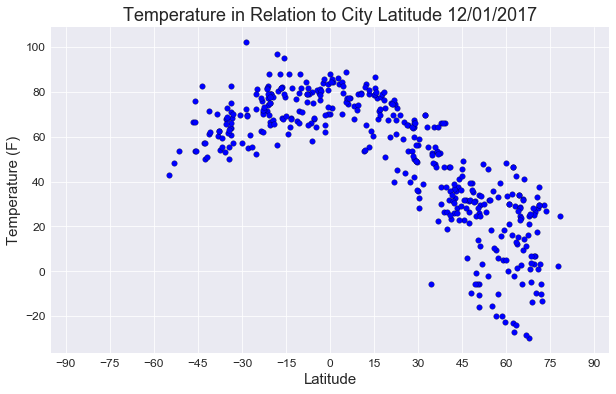

In [7]:
# plot temperature in relation to latitude
# change plot size
fig = plt.figure(figsize=(10, 6))

# change plot style
sns.set()
sns.set_context("paper")

# plot data
plt.scatter(city_df['Latitude'], city_df['Temperature_(F)'], color='blue', edgecolor='black')

# change x-axis limit
plt.xlim(-95, 95)

# adjust font size of axis ticks
plt.xticks(np.arange(-90, 100, 15), fontsize=12)
plt.yticks(fontsize=12)

# add title and labels to axes
plt.title(f'Temperature in Relation to City Latitude {cur_date}', fontsize=18)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Temperature (F)', fontsize=15)

# save and show plot
plt.savefig('Temperature_v_Lattitude.png')
plt.show()

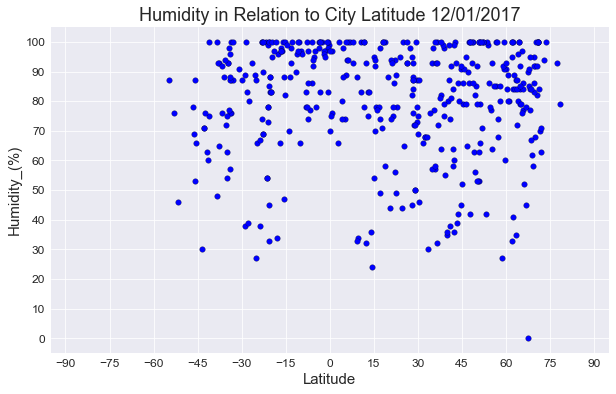

In [8]:
# plot humidity in relation to latitude
# change plot size
fig = plt.figure(figsize=(10, 6))

# change plot style
sns.set()
sns.set_context("paper")

# plot data
plt.scatter(city_df['Latitude'], city_df['Humidity_(%)'], color='blue', edgecolor='black')

# change x-axis limit
plt.xlim(-95, 95)

# adjust font size of axis ticks
plt.xticks(np.arange(-90, 100, 15), fontsize=12)
plt.yticks(np.arange(0, 110, 10), fontsize=12)

# add title and labels to axes
plt.title(f'Humidity in Relation to City Latitude {cur_date}', fontsize=18)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity_(%)', fontsize=15)

# save and show plot
plt.savefig('Humidity_v_Lattitude.png')
plt.show()

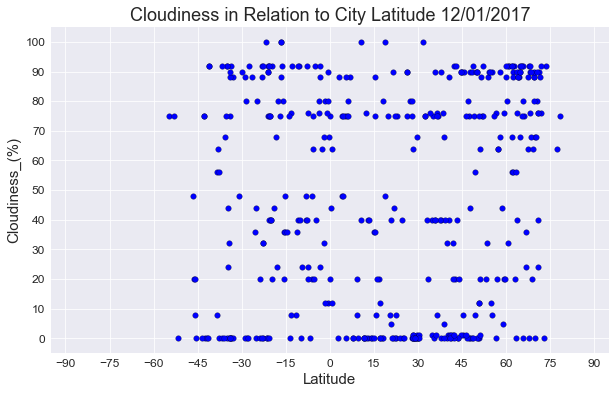

In [9]:
# plot cloudiness in relation to latitude
# change plot size
fig = plt.figure(figsize=(10, 6))

# change plot style
sns.set()
sns.set_context("paper")

# plot data
plt.scatter(city_df['Latitude'], city_df['Cloudiness_(%)'], color='blue', edgecolor='black')

# change x-axis limit
plt.xlim(-95, 95)

# adjust font size of axis ticks
plt.xticks(np.arange(-90, 100, 15), fontsize=12)
plt.yticks(np.arange(0, 110, 10), fontsize=12)

# add title and labels to axes
plt.title(f'Cloudiness in Relation to City Latitude {cur_date}', fontsize=18)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness_(%)', fontsize=15)

# save and show plot
plt.savefig('Cloudiness_v_Lattitude.png')
plt.show()

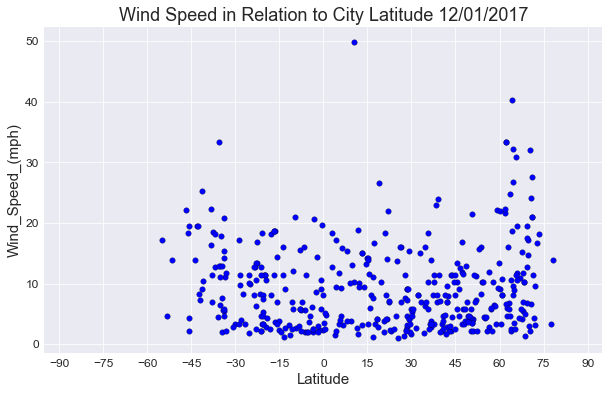

In [10]:
# plot wind speed in relation to latitude
# change plot size
fig = plt.figure(figsize=(10, 6))

# change plot style
sns.set()
sns.set_context("paper")

# plot data
plt.scatter(city_df['Latitude'], city_df['Wind_Speed_(mph)'], color='blue', edgecolor='black')

# change x-axis limit
plt.xlim(-95, 95)

# adjust font size of axis ticks
plt.xticks(np.arange(-90, 100, 15), fontsize=12)
# plt.yticks(np.arange(0, 60, 10), fontsize=12)
plt.yticks(fontsize=12)

# add title and labels to axes
plt.title(f'Wind Speed in Relation to City Latitude {cur_date}', fontsize=18)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind_Speed_(mph)', fontsize=15)

# save and show plot
plt.savefig('Wind_Speed_v_Lattitude.png')
plt.show()